<a href="https://colab.research.google.com/github/r4phael/ml-course/blob/master/notebooks/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Semana 3 - Regressão Linear**

Importando libs

In [0]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from matplotlib.colors import ListedColormap
#Modelo:
from sklearn.linear_model import LinearRegression

Importando funções

In [0]:
# Função que gera o gráfico dos resultados de regressão
def plot_results_linear(X, y, regressor, title):
    plt.scatter(X, y, color = 'red')
    plt.plot(X, regressor.predict(X), color = 'blue')
    plt.title(title)
    plt.xlabel('Tamanho do Lote')
    plt.ylabel('Preço de Vendas')
    plt.show()

Importando os dados

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/r4phael/ml-course/master/data/pricing_houses.csv')
df = df.loc[:, ['LotArea', 'PoolArea', 'GarageArea', 'OverallCond','YearBuilt', 'MSZoning', 'SalePrice']].sample(n=60, random_state=0, weights = 'SalePrice')

Descrevendo o dataset

In [4]:
df.describe()

LotArea  PoolArea  ...    YearBuilt      SalePrice
count     60.000000      60.0  ...    60.000000      60.000000
mean   11633.933333       0.0  ...  1972.116667  197536.150000
std     8099.879028       0.0  ...    30.522618   74910.507145
min     1477.000000       0.0  ...  1875.000000   80000.000000
25%     8068.500000       0.0  ...  1950.750000  142250.000000
50%    10510.000000       0.0  ...  1976.500000  188750.000000
75%    12010.750000       0.0  ...  2002.000000  235032.000000
max    53227.000000       0.0  ...  2009.000000  437154.000000

[8 rows x 6 columns]

Visualizando o dataset

In [5]:
df.head(5)

LotArea  PoolArea  GarageArea  OverallCond  YearBuilt MSZoning  SalePrice
789     12205         0         444            8       1966       RL     187500
1039     1477         0         286            4       1970       RM      80000
868     14762         0         672            6       1948       RL     169000
782     16285         0         605            5       2001       RL     187100
611     10395         0         564            6       1978       RL     148000

Preenchendo os valores númericos nulos (NA) com a mediana.

In [6]:
df = df.fillna(df.median())

df.head(5)

LotArea  PoolArea  GarageArea  OverallCond  YearBuilt MSZoning  SalePrice
789     12205         0         444            8       1966       RL     187500
1039     1477         0         286            4       1970       RM      80000
868     14762         0         672            6       1948       RL     169000
782     16285         0         605            5       2001       RL     187100
611     10395         0         564            6       1978       RL     148000

Definindo as variáveis independentes

In [7]:
X = df.loc[:, 'LotArea'].values.reshape(-1,1)
X[:5]


array([[12205],
       [ 1477],
       [14762],
       [16285],
       [10395]])

Definindo as variáveis dependentes.

In [8]:
y = df.loc[:, 'SalePrice'].values.reshape(-1,1)
y[:5]


array([[187500],
       [ 80000],
       [169000],
       [187100],
       [148000]])

 Criando os subconjuntos de treinamento e testes

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Tamanho do Dataset. {}".format(df.shape[0]))
print("Tamanho do Conjunto de Treinamento. {}".format(len(X_train)))
print("Tamanho do Conjunto de Testes. {}".format(len(X_test)))

Tamanho do Dataset. 60
Tamanho do Conjunto de Treinamento. 48
Tamanho do Conjunto de Testes. 12


Normalizando as features 

In [0]:
#X_train = feature_scaling(X_train)
#X_test = feature_scaling(X_test)

#X_train[:5]

Treinando o modelo de Regressao Linear com o Conjunto de Treinamento

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Prevendo os resultados do modelo criado com o conjunto de testes

In [12]:
y_pred = regressor.predict(X_test)

y_pred

array([[207117.08544721],
       [183686.58545274],
       [169299.32577351],
       [179936.94922447],
       [188476.03676953],
       [191960.99279345],
       [202201.59593788],
       [465634.02218018],
       [206688.55559255],
       [176212.52063471],
       [195653.91183507],
       [185759.91372014]])

Avaliando o modelo com a métrica r2

In [13]:
regressor.score(X_test, y_test)

-0.9506477517227611

Exibindo os resultados do conjunto de treinamento

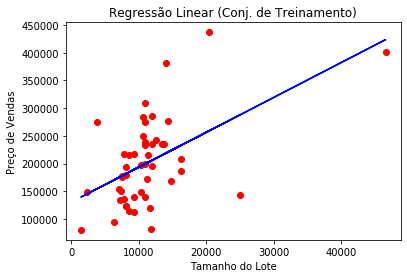

In [14]:
plot_results_linear(X_train, y_train, regressor, 'Regressão Linear (Conj. de Treinamento)')

Exibindo os resultados do conjunto de testes

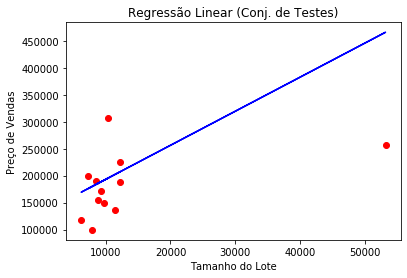

In [15]:
plot_results_linear(X_test, y_test, regressor, 'Regressão Linear (Conj. de Testes)')